In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/"

from data_grid import DataGrid

dgrid = DataGrid(path, """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv""",range=None)

Loading Data from: ../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/"

from data_grid import DataGrid

dgrid = DataGrid(path, """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv""",range=None)

q =dgrid.data[1][:,0]

X = dgrid.get_data_array()

# truth_labels=np.array(list([4,4,4,4,4])+list([4,4,4,4,4,4,4,3,3])+list([4,4,4,4,4,4,4,3,3,3,3])+list([4,4,4,11,4,4,4,4,3,3,3,2,2])+list([4,4,4,11,11,4,4,4,3,3,2,2,1])+list([5,5,4,11,11,11,4,4,5,5,2,2,1,1,1])+list([6,5,5,11,11,11,4,5,5,2,2,1,1,1,1])+list([7,6,5,5,11,11,5,5,2,2,1,1,1,1,1])+list([7,7,6,5,5,5,5,10,10,2,1,1,1,1,1])+list([7,7,6,6,10,10,10,10,10,9,1,1,1,1,1])+list([8,8,6,6,6,6,9,9,9,1,1,1,1])+list([8,8,8,6,9,9,9,9,9,1,1,1,1])+list([8,8,6,9,9,9,9,1,1,1,1])+list([8,6,9,9,9,9,1,1,1])+list([9,9,9,1,1]))
# #This part of the code is a savior
# new_truth_labels=[None]*177
# for ii in range(0,177):
#     x,y=dgrid.coord(ii+1)
#     new_grid=dgrid.grid_num(16-x,y)
#     new_truth_labels[new_grid-1]=truth_labels[ii]
# y=np.array(new_truth_labels)

coords = np.array([dgrid.coord(ii + 1) for ii in range(177)])
coordi = coords - 1

dim = coordi.max() + 1

m3d = np.zeros((dim, dim, X.shape[1]))

for k, (i, j) in enumerate(coordi):
    m3d[i, j, :] = X[k]

Loading Data from: ../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


In [2]:
!pip install dill

In [3]:
import dill

In [173]:
with open("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D.dgrid.pkl", 'wb') as f:
    dill.dump(dgrid, f)

In [182]:
with open("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D.dgrid.pkl", "rb") as f:
    t = dill.load(f)

<IPython.core.display.Javascript object>


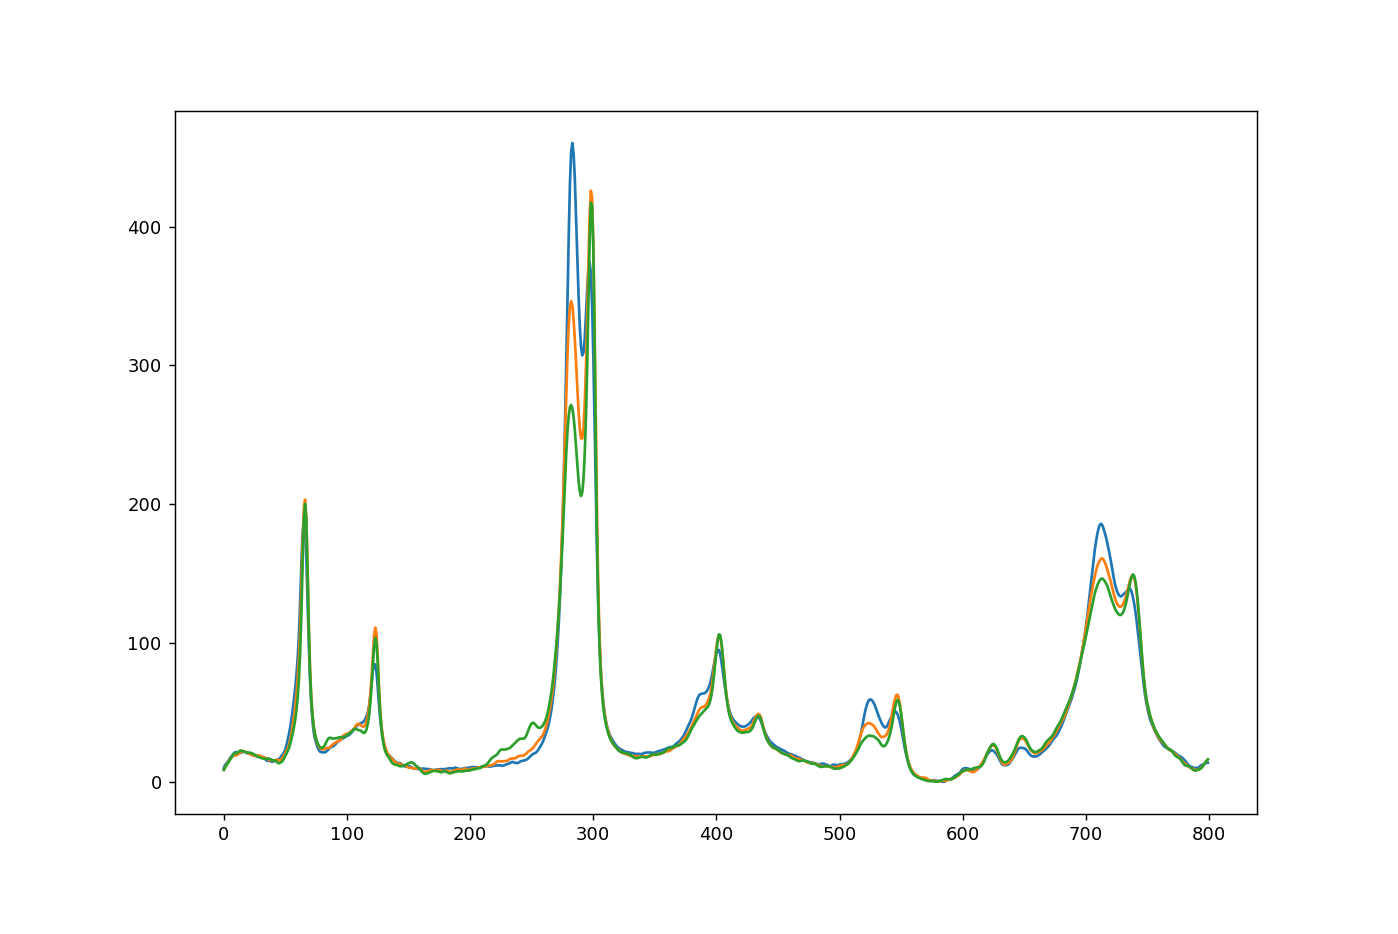

In [907]:
plt.plot(X[118])
plt.plot(X[119])
plt.plot(X[120])

In [6]:
q =dgrid.data[1][:,0]

X = dgrid.get_data_array()

truth_labels=np.array(list([4,4,4,4,4])+list([4,4,4,4,4,4,4,3,3])+list([4,4,4,4,4,4,4,3,3,3,3])+list([4,4,4,11,4,4,4,4,3,3,3,2,2])+list([4,4,4,11,11,4,4,4,3,3,2,2,1])+list([5,5,4,11,11,11,4,4,5,5,2,2,1,1,1])+list([6,5,5,11,11,11,4,5,5,2,2,1,1,1,1])+list([7,6,5,5,11,11,5,5,2,2,1,1,1,1,1])+list([7,7,6,5,5,5,5,10,10,2,1,1,1,1,1])+list([7,7,6,6,10,10,10,10,10,9,1,1,1,1,1])+list([8,8,6,6,6,6,9,9,9,1,1,1,1])+list([8,8,8,6,9,9,9,9,9,1,1,1,1])+list([8,8,6,9,9,9,9,1,1,1,1])+list([8,6,9,9,9,9,1,1,1])+list([9,9,9,1,1]))
#This part of the code is a savior
new_truth_labels=[None]*177
for ii in range(0,177):
    x,y=dgrid.coord(ii+1)
    new_grid=dgrid.grid_num(16-x,y)
    new_truth_labels[new_grid-1]=truth_labels[ii]
y=np.array(new_truth_labels)

(177, 800)


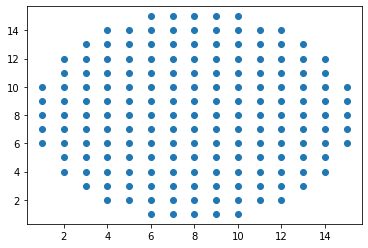

In [14]:
plt.scatter(*coords.T)

In [18]:
r7 = (coords[:, 1] == 7)

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


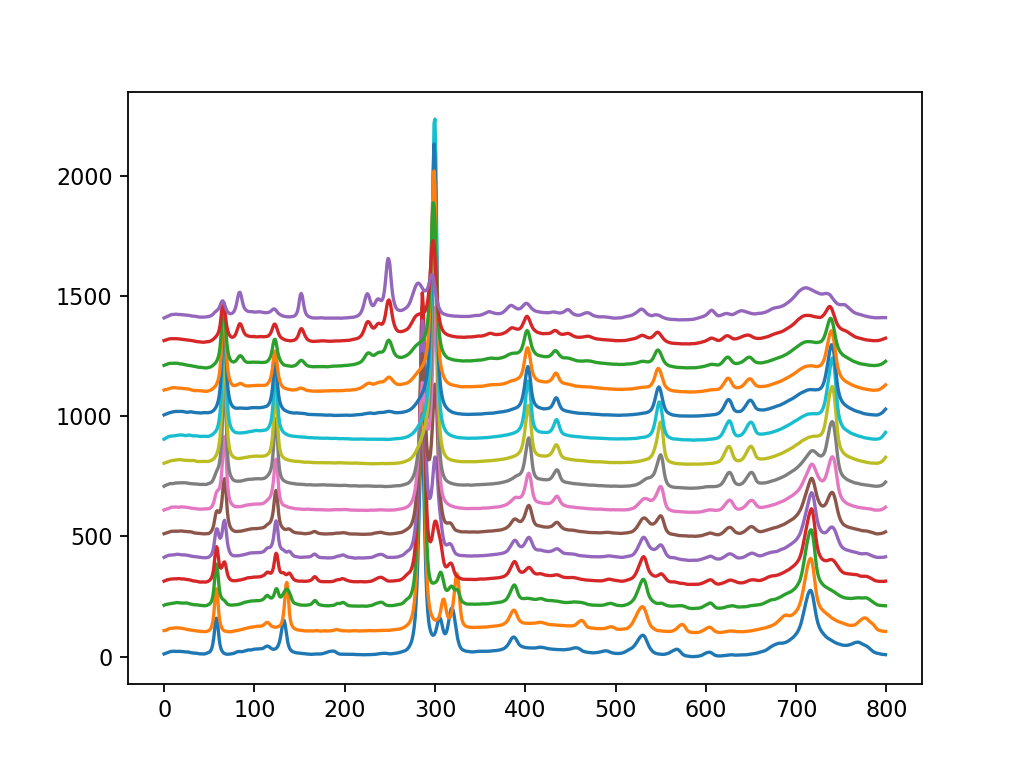

In [23]:
for i, row in enumerate(X[r7]):
    plt.plot(row + 100 * i)

In [181]:
pd.DataFrame(np.hstack((X, y[:, None])), header = q)

TypeError: __init__() got an unexpected keyword argument 'header'

In [178]:
np.save("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D_X.npy", X)

In [652]:
np.save("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D_y.npy", y)

In [100]:
def cm(X):
    return (q * (X  / X.sum(axis = 1)[:, None])).sum(axis = 1)

In [70]:
cm = (q * (X  / X.sum(axis = 1)[:, None])).sum(axis = 1)

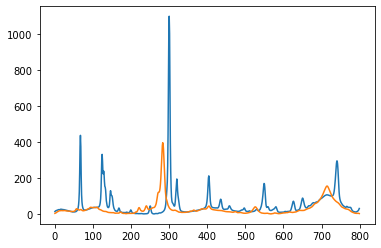

In [71]:
plt.plot(X[0])
plt.plot(X[-1])

In [915]:
xy = np.hstack((X, y[:, None]))

In [916]:
clusters = pd.DataFrame(xy).groupby(800).apply(lambda x: x.values[:, :-1]).values

In [917]:
len(clusters[-1])

11

In [108]:
%matplotlib notebook

Plot average pattern for each of 11 ground truth phases:

<IPython.core.display.Javascript object>


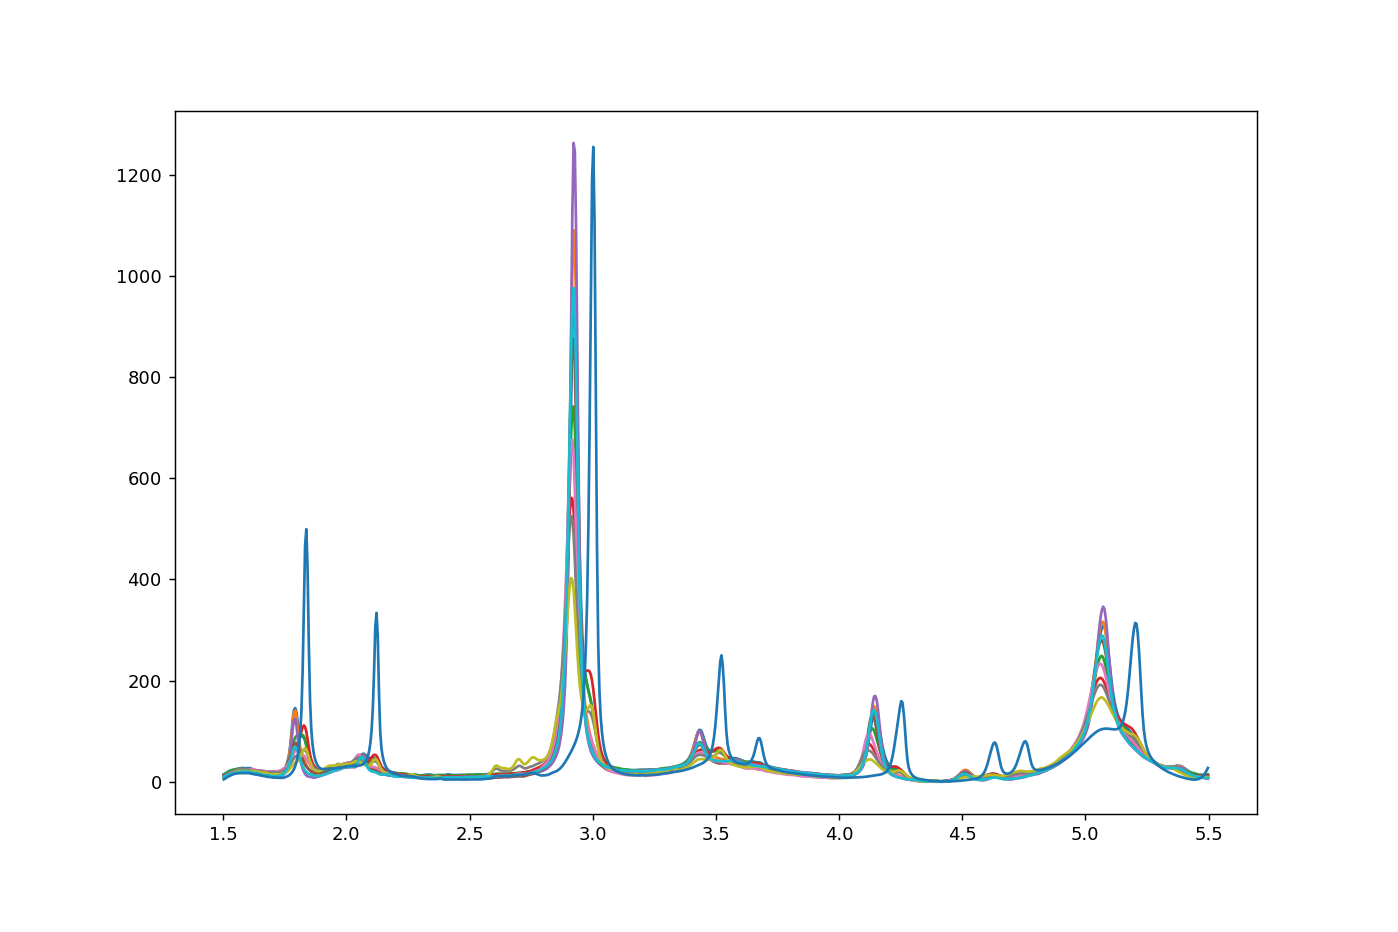

In [896]:
[plt.plot(q, clusters[8][i]) for i in range(10)]
plt.plot(q, clusters[10].mean(axis = 0))

In [737]:
[plt.plot(q, 1000 * i + clusters[i].mean(axis = 0)) for i in range(11)];

<IPython.core.display.Javascript object>

In [767]:
from xrd_clustering.xrdc.utils.utils import mpl_plotly as mpl

In [765]:
utils

<module 'xrd_clustering.xrdc.utils.utils.utils' from '/Users/ollie/Documents/SLAC/xrd_clustering/xrdc/utils/utils/utils.py'>

In [754]:
ls xrd_clustering/xrdc/utils/

setup.py  tests/    utils/


In [745]:
clusters[4].shape

(16, 800)

In [772]:
import chart_studio.plotly as py


In [780]:
%matplotlib notebook

In [778]:
mpl.plt.plot([1, 2, 3])

### Within-phase variation:

Some amount of lattice parameter variation is apparent (order of 2 percent). q shifting is also not uniform for all peaks.

In [901]:
(1.837 - 1.832) / 1.837

0.0027218290691344003

In [900]:
(5.2079 - 5.196) / 5.196

0.0022902232486529425

<IPython.core.display.Javascript object>


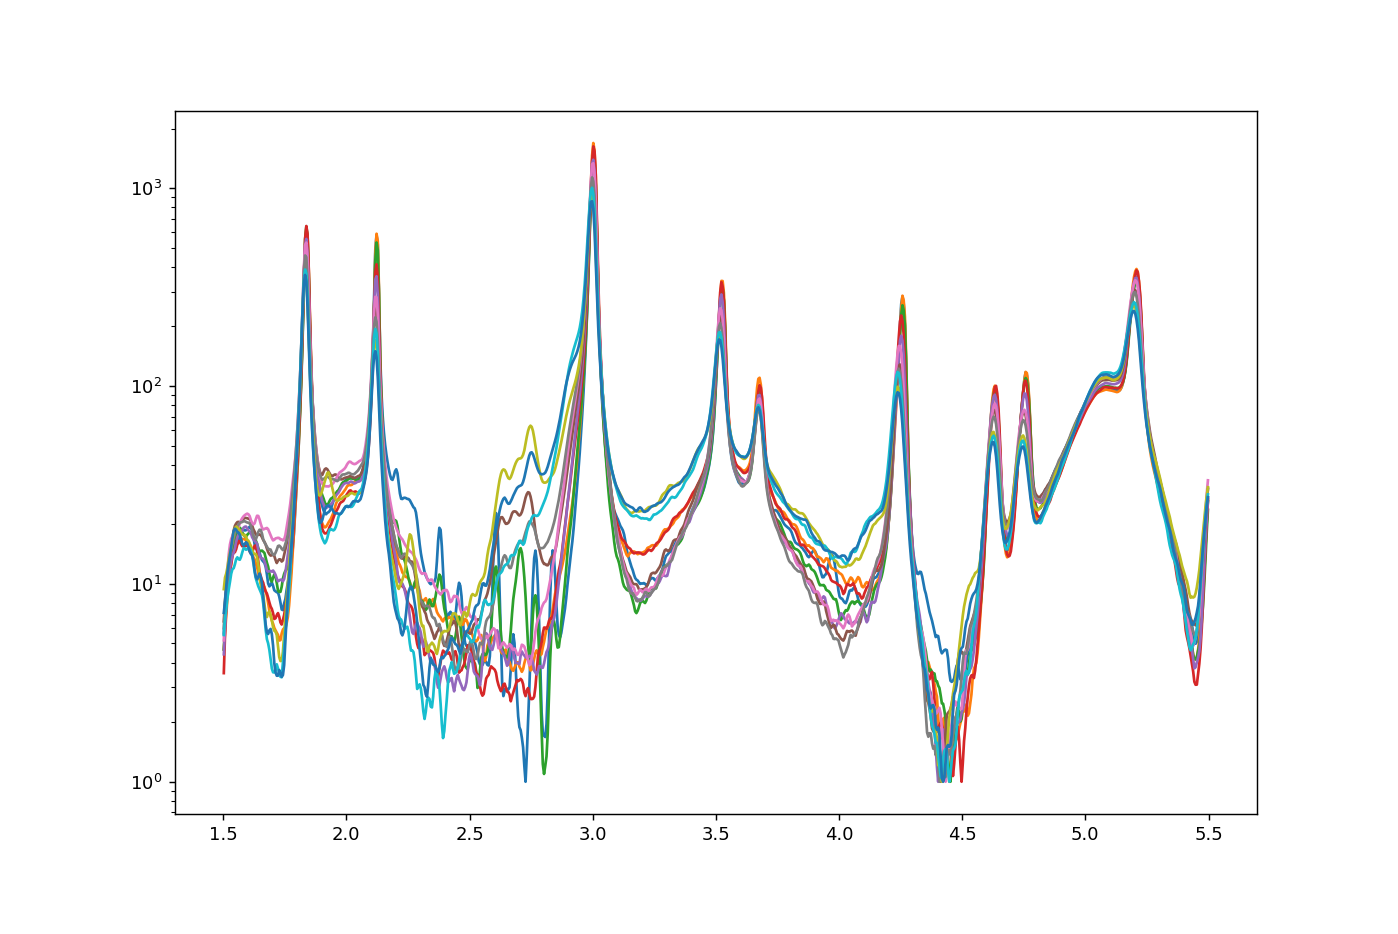

[]

In [904]:
[plt.plot(q, 1 + p) for p in clusters[10]];
plt.semilogy()

### Autocorrelation of intensity relative to cluster average:

HWHM approximately equal to 10. We can use this to approximate XRD intensity variation in simulated data.

In [876]:
grouped_clusters[-1].shape

(11, 800)

In [874]:
((grouped_clusters[-1] + .01) / (grouped_clusters[-1] + .01).mean(axis = 0)).std(axis = 1)

0.3412764973823199

<IPython.core.display.Javascript object>


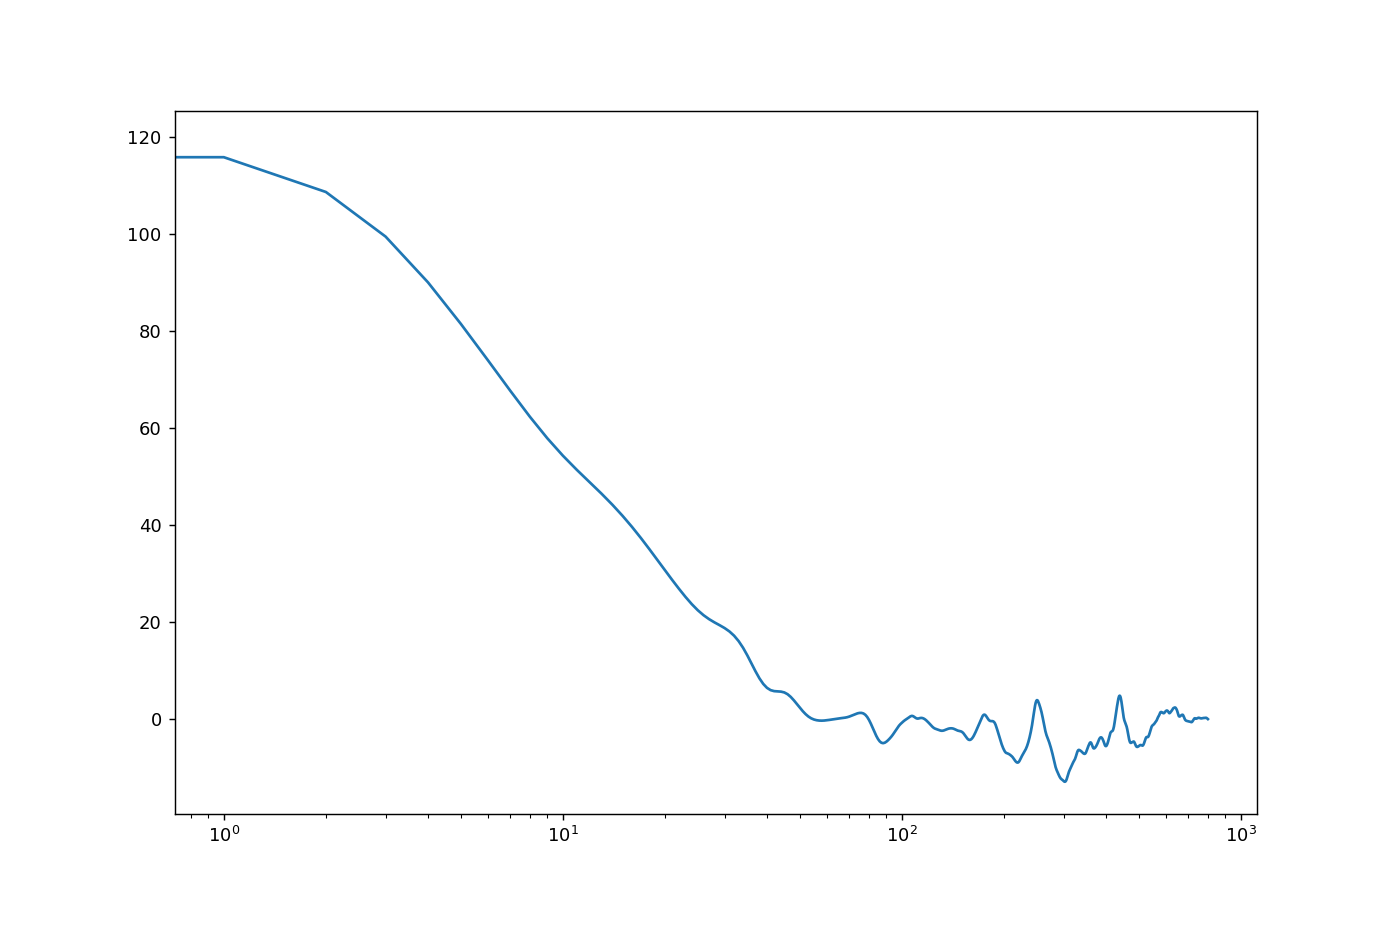

[]

In [743]:
ratios = np.vstack([n0 / n0.mean(axis = 0) for n0 in grouped_clusters])

plt.plot(np.array([autocorr(ratios[i]) for i in range(len(ratios))]).mean(axis = 0))
plt.semilogx()

In [885]:
plt.plot(ratios[-4])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


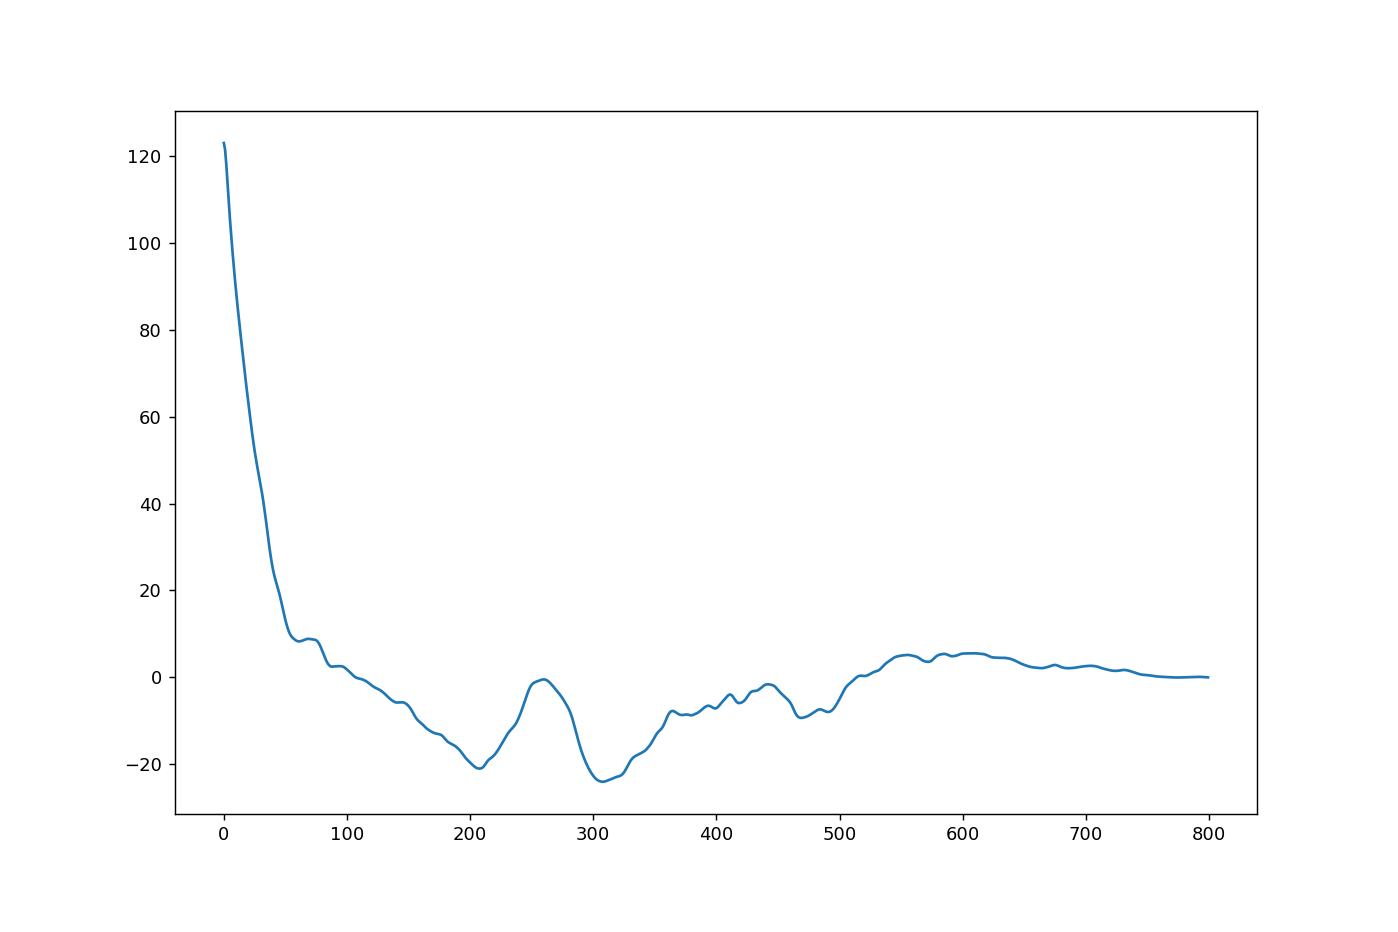

In [888]:
plt.plot(np.array([autocorr(ratios[-11:][i]) for i in range(len(ratios[-11:]))]).mean(axis = 0))
#plt.semilogx()

This relative intensity variation can be roughly modeled as a gaussian process:

In [807]:
reload(xdu)

<module 'xrd_clustering.xrdc.xrdutils' from '/Users/ollie/Documents/SLAC/xrd_clustering/xrdc/xrdutils.py'>

<IPython.core.display.Javascript object>


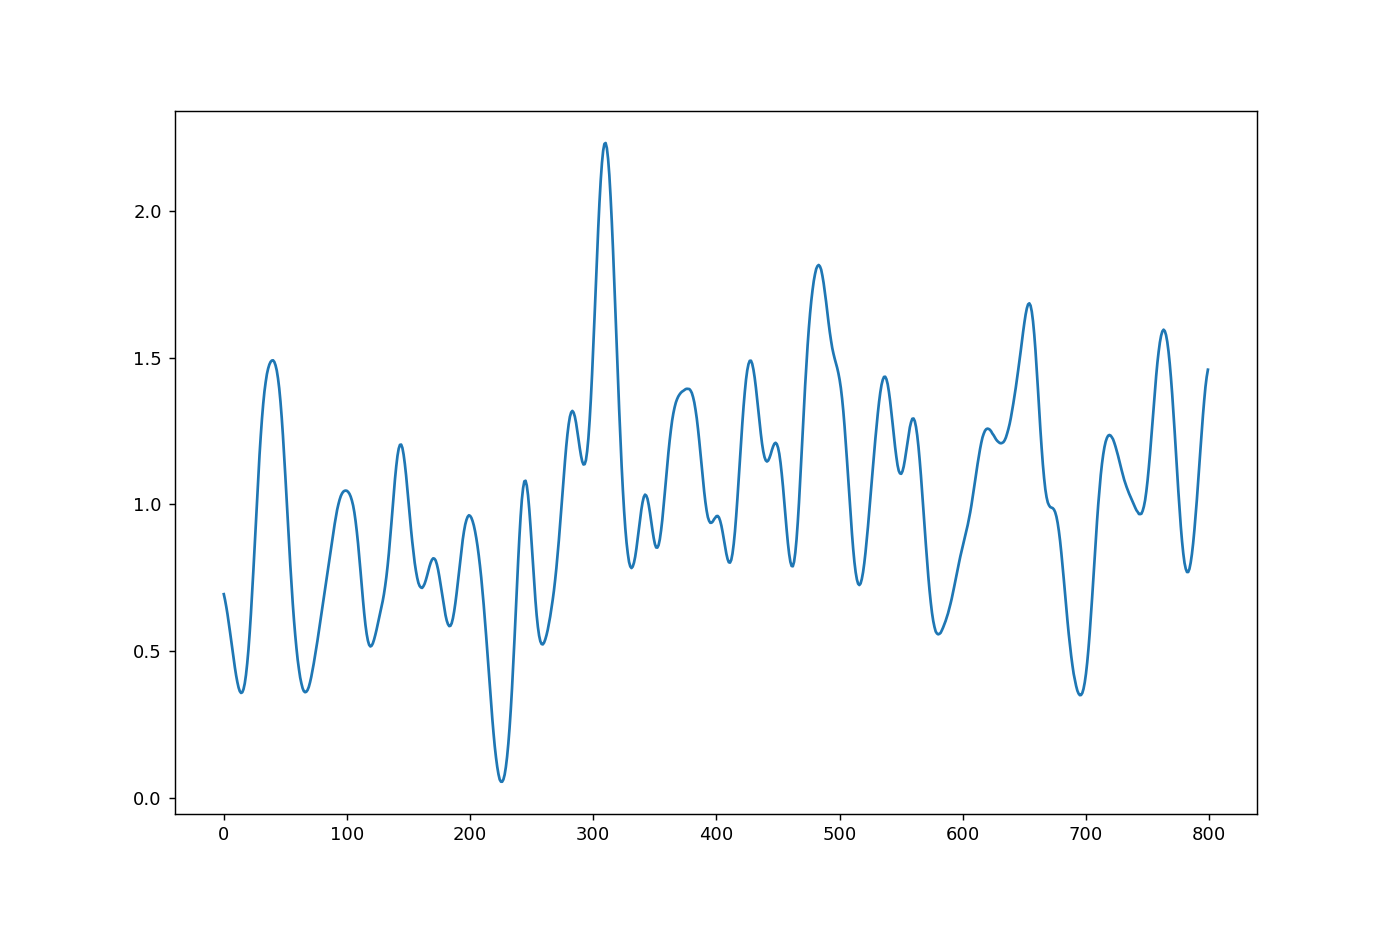

In [809]:
I = xdu.mk_generate_peak_scales(sigma_peakvar = 10, scale = .4)
plt.plot(I)

In [811]:
I = xdu.mk_generate_peak_scales(sigma_peakvar = 10, scale = .4)

In [820]:
reload(xdu)

<module 'xrd_clustering.xrdc.xrdutils' from '/Users/ollie/Documents/SLAC/xrd_clustering/xrdc/xrdutils.py'>

In [828]:
xdu.mk_generate_peak_scales(sigma_peakvar = 10, scale = .4)().std()

0.4


0.43040528521921906

0.4


<IPython.core.display.Javascript object>


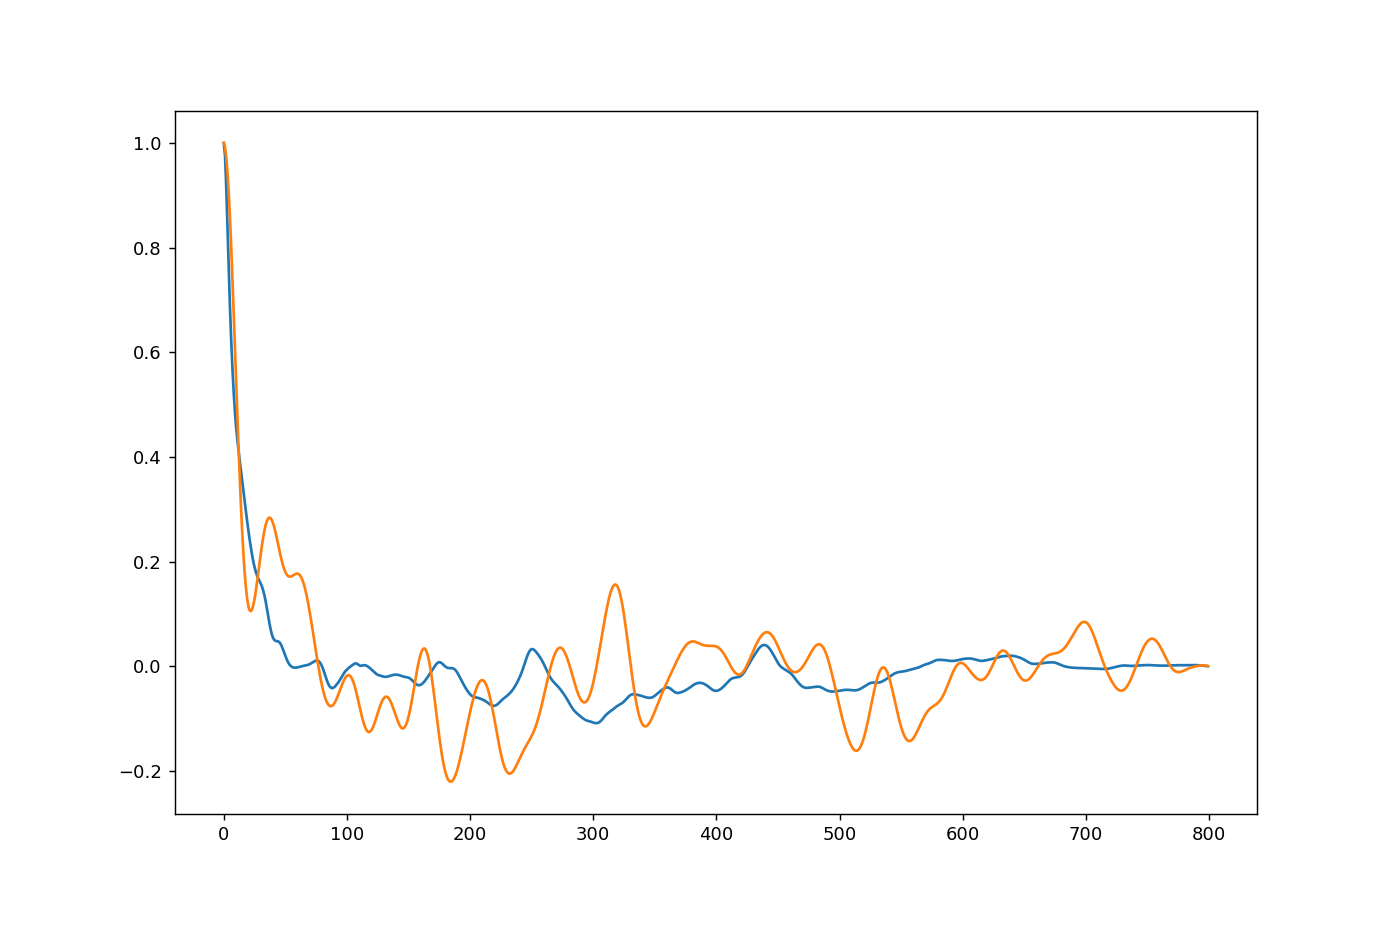

In [835]:
autocorr_data = np.array([autocorr(ratios[i]) for i in range(len(ratios))]).mean(axis = 0)
autocorr_data /= autocorr_data.max()

I = xdu.mk_generate_peak_scales(sigma_peakvar = 10, scale = .4)()
autocorr_sim = autocorr(I)
autocorr_sim = autocorr_sim / autocorr_sim.max()

plt.plot(autocorr_data)
plt.plot(autocorr_sim)
#plt.semilogx()

Add random q-jitter (also generated as a Gaussian process) to shift peaks relative to one another, in addition to peak height variation:

<IPython.core.display.Javascript object>


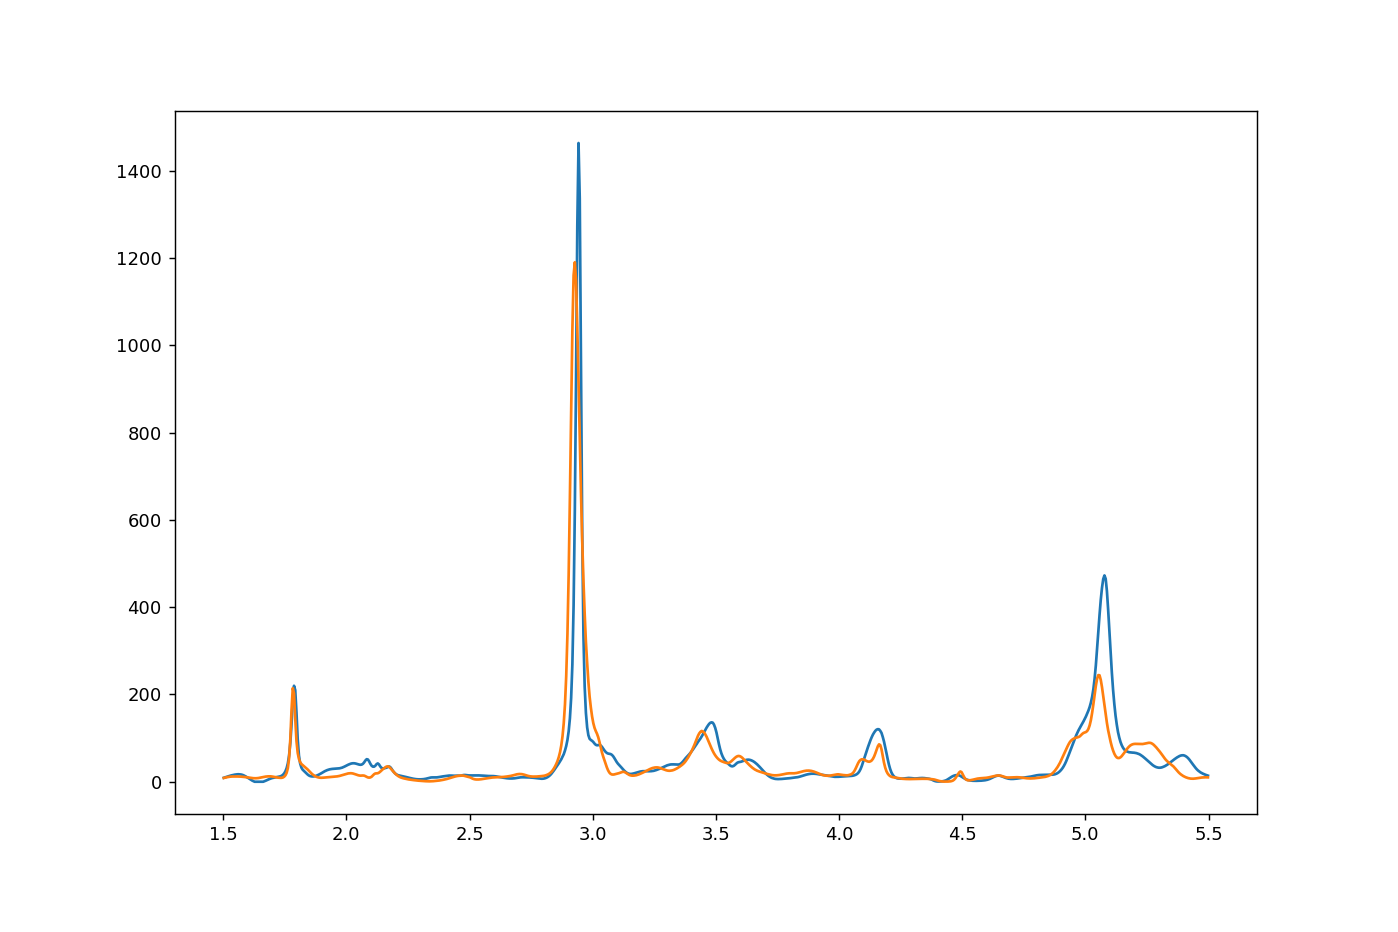

In [719]:
plt.plot(q, xdu.mutate_pattern(tpat, 1, q_jitter_magnitude=.005, peak_height=True))
plt.plot(q, xdu.mutate_pattern(tpat, 1, q_jitter_magnitude=.005, peak_height=True))

In [ ]:
grouped_clusters = [np.array([clusters[j][i] / clusters[j][i].mean() for i in range(len(clusters[j]))])
                            for j in range(11)]

n0 = grouped_clusters[1]

reload(xdu)

tpat = clusters[0].mean(axis = 0)

In [624]:
ratios.std()

0.3996893082534025

In [630]:
def autocorr(x):
    result = np.correlate(x - x.mean(), x - x.mean(), mode='full')
    return result[result.size//2:] #/ (np.std(x)**2)

In [293]:
from xrd_clustering.xrdc.xrdutils import gauss

from gpflow.kernels import RBF

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import gpflow
from gpflow.kernels import RBF
from gpflow.likelihoods import Gaussian
from gpflow.mean_functions import MeanFunction
from gpflow.models import GPR
from gpflow.base import Parameter

from gpflow.ci_utils import ci_niter

def generate_peak_scales(N=800, num_samples = 10):
    """
    Model peak height variation as a guassian process.

    Returns:
        Tuple of np.arrays of size (N, 1) and (N, num_functions).
    """
    jitter = 1e-6
    #Xs = np.linspace(-5.0, 5.0, N)[:, None]
    Xs = q[:, None]
    kernel = RBF(lengthscales=sigma_peakvar)
    cov = kernel(Xs)
    L = np.linalg.cholesky(cov + np.eye(N) * jitter)
    epsilon = np.random.randn(N, num_samples) * .4
    F = 1 + np.matmul(L, epsilon)
    mask = (F < 0)
    F[mask] = 0
    return F

In [429]:
from xrd_clustering.xrdc.xrdutils import mutate_pattern

In [583]:
from importlib import reload
import xrd_clustering.xrdc.xrdutils as xdu
import xrd_clustering.xrdc.sims as sims
reload(xdu)

<module 'xrd_clustering.xrdc.xrdutils' from '/Users/ollie/Documents/SLAC/xrd_clustering/xrdc/xrdutils.py'>

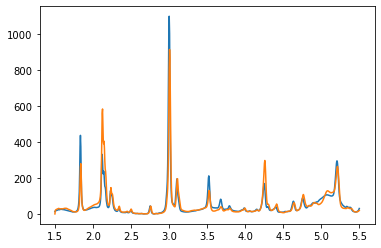

In [511]:
plt.plot(q, X[0])
plt.plot(q, xdu.mutate_pattern(X[0], 1.002, scale_type = 'scale'))

Generate training data with q scaling, peak height variation, and q jitter

In [891]:
reload(xdu)

<module 'xrd_clustering.xrdc.xrdutils' from '/Users/ollie/Documents/SLAC/xrd_clustering/xrdc/xrdutils.py'>

In [892]:
XX_train, yy_train = xdu.mk_simdata(X, 80, .975, 1.025, y = None, scale_type = 'scale', peak_height = True, q_jitter_magnitude= None)

scale type: scale
q jitter: None


<IPython.core.display.Javascript object>


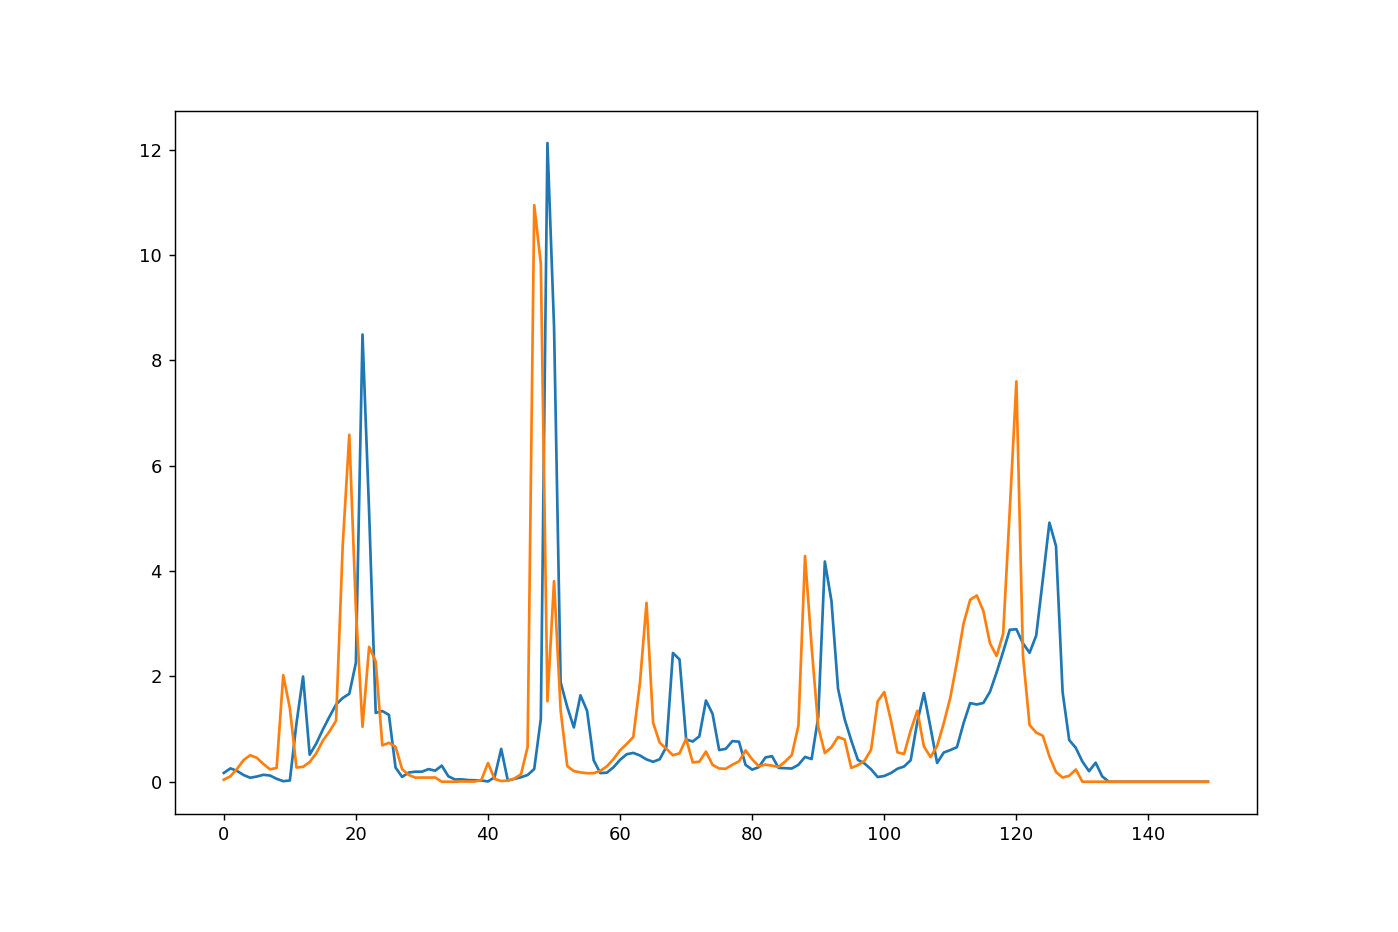

In [734]:
plt.plot(XX_train[2])
plt.plot(XX_train[3])

In [893]:
import os
prefix = "xrd_clustering/data/TiNiSn_experimental_6/train/"
os.makedirs(prefix, exist_ok=True)

np.save("{}x.npy".format(prefix), XX_train)

np.save("{}y.npy".format(prefix), yy_train)

In [731]:
prefix = "xrd_clustering/data/TiNiSn_experimental/test/"
os.makedirs(prefix, exist_ok=True)

np.save("{}x.npy".format(prefix), Xn)

np.save("{}y.npy".format(prefix), y[:, None])

Train model

In [536]:
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path ../data/TiNiSn_experimental_5_jitter/train/ --test_path ../data/TiNiSn_experimental/test/\
    --name TiNiSn_experimental_5_jitter \
    --n_classes 177 --epochs 100

(14160, 1)

Latent space distribution of the ground truth phases:

![title](tmp/siamese-constrastive_1d-XRD-TiNiSn_experimental_5_jitter-testing-set-embedding.png)

mutual information score with Euclidean distance metric: 0.67

In [997]:
def to_standard(X, y):
    return np.vstack([xdu.condense(X[i], 150) for i in range(X.shape[0])]), y[:, None]

In [1004]:
neighbor_based_classes_i = [(np.array(list(dgrid.neighbors(i + 1).values()) + [i + 1]) - 1) for i in range(len(y))]

X_neighbor = np.vstack([X[neighbor_based_classes_i[i]] for i in range(len(y))])
y_neighbor = np.hstack([np.repeat(i, len(neighbor_based_classes_i[i])) for i in range(len(y))])

XX_train, yy_train = to_standard(X_neighbor, y_neighbor)

prefix = "xrd_clustering/data/TiNiSn_experimental_neighbors/train/"
os.makedirs(prefix, exist_ok=True)

np.save("{}x.npy".format(prefix), XX_train)
np.save("{}y.npy".format(prefix), yy_train)

In [999]:
single_phase_m = (y == 11)
X_sp = np.vstack((X[single_phase_m], X[~single_phase_m]))
y_sp = np.hstack((np.repeat(0, single_phase_m.sum()), np.repeat(1, (~single_phase_m).sum())))

XX_train, yy_train = to_standard(X_sp, y_sp)

prefix = "xrd_clustering/data/TiNiSn_experimental_supervised/train/"
os.makedirs(prefix, exist_ok=True)

np.save("{}x.npy".format(prefix), XX_train)
np.save("{}y.npy".format(prefix), yy_train)

In [1000]:
XX_train.shape

(177, 150)

In [994]:
y_sp.shape

(177,)

In [987]:
XX_train.shape, yy_train.shape

((648, 150), (648, 1))

In [988]:
pwd

'/Users/ollie/Documents/SLAC'

In [855]:
import utils

In [857]:
!ln sutils.py utils.py

ln: sutils.py: No such file or directory


In [861]:
!ln utils.py sutils.py


In [862]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, fowlkes_mallows_score

import sutils as utils

from sklearn.cluster import KMeans
import numpy as np
X = utils.get_embedding(net, original_test_loader)[0]
kmeans = KMeans(n_clusters=11, random_state=0).fit(X)
kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

aglom = AgglomerativeClustering(11, affinity='cosine', linkage = 'single').fit(X)
aglom.labels_

ypred = kmeans.predict(X)

adjusted_mutual_info_score(y, ypred),\
adjusted_rand_score(y, ypred),\
fowlkes_mallows_score(y, ypred)

NameError: name 'net' is not defined

> <ipython-input-862-f7baf0bcbfe9>(8)<module>()
      6 from sklearn.cluster import KMeans
      7 import numpy as np
----> 8 X = utils.get_embedding(net, original_test_loader)[0]
      9 kmeans = KMeans(n_clusters=11, random_state=0).fit(X)
     10 kmeans.labels_

ipdb> c


In [588]:
(4.146 - 4.238)/4.146

-0.02219006271104692

In [589]:
(1.791 - 1.833) / 1.791

-0.02345058626465664

In [549]:
XX_train = XX_train / XX_train.mean()

In [563]:
Xn = np.vstack([xdu.condense(x, 150) for x in X])

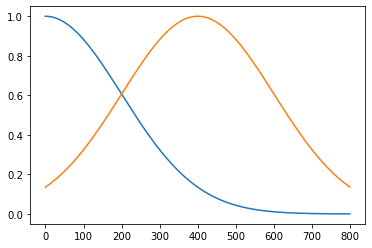

In [345]:
plt.plot(np.array(cov[0]))
plt.plot(np.array(cov[400]))

In [154]:
iratios = np.array([np.array([rel(n0[i], n0[j]) for j in range(len(n0))]) for i in range(len(n0))])

In [159]:
iratios.shape

(40, 40, 800)

In [156]:
np.percentile(iratios, 99.9)

18.533176452736807

In [157]:
iratios.max()

55.44152121356203

In [158]:
np.percentile(np.array(n0), 1)

0.013923426289230902

In [162]:
iratios[10, 0]

array([1.14834714, 1.09363249, 1.09830125, 1.13012981, 1.12484663,
       1.10345508, 1.0725768 , 1.04541563, 1.03963597, 1.06168948,
       1.07518324, 1.10631694, 1.12742714, 1.10047296, 1.07155142,
       1.03878225, 1.01255373, 1.02621882, 1.07657409, 1.10494741,
       1.11466307, 1.12106861, 1.13049929, 1.14386851, 1.1620784 ,
       1.18489826, 1.14314237, 1.07939472, 1.02183456, 1.0413894 ,
       1.15736443, 1.20826558, 1.12744624, 1.05311139, 1.02242434,
       1.0690486 , 1.15900165, 1.23694621, 1.27889971, 1.33501234,
       1.35147759, 1.27382084, 1.26060152, 1.28982345, 1.29704498,
       1.29637187, 1.21691884, 1.16575245, 1.17233944, 1.19652064,
       1.20784917, 1.1990875 , 1.21329964, 1.19277643, 1.15394085,
       1.15207823, 1.18985106, 1.21075457, 1.19807992, 1.15819485,
       1.10293435, 1.05413003, 1.02218586, 0.98631647, 0.85453444,
       0.65093965, 0.53626496, 0.46988624, 0.44840609, 0.48368512,
       0.51986413, 0.5552008 , 0.5862381 , 0.61167367, 0.63704

In [3]:
ls data

100_member/                          CoNi_shift_2/
AlLiFe_0980/                         CoNi_shift_2_1/
AlLiFe_0992/                         CoNi_shift_extended/
AlLiFe_09927_100p_aug/               CoNi_shift_extended_2/
AlLiFe_09927_100p_aug_8pshift/       CoNi_shift_grouped/
AlLiFe_09927_100p_aug_8pshift_log/   CoNi_shift_grouped_sliding/
AlLiFe_0995/                         CoNi_shift_p0/
AlLiFe_0995_100p/                    CoNi_shift_p1/
CoNiSn_shift/                        CoNi_shift_p8/
CoNiSn_shift_faces/                  CoNi_shift_small/
CoNiSn_shift_faces_500epoch_biased/  CoNi_sliding_40_20/
CoNiSn_shift_faces_500epoch_uniform/ KMO/
CoNiSn_shift_faces_600epoch/         TiNiSn/
CoNiSn_shift_faces_600epoch_biased/  inst12_Cu3Bi4V6/
CoNiSn_shift_faces_600epoch_uniform/ testing/


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "data/KMO/"

from data_grid import DataGrid

dgrid = DataGrid(path, """KM013_X_12092019_YNiSb500_t45_(?P<num>.*?)_bkgdSub_1D.csv""",range=None)

Loading Data from: data/KMO/
Data Loaded Succesfully


In [6]:
dgrid

In [7]:
q =dgrid.data[1][:,0]

X = dgrid.get_data_array()

(177, 800)


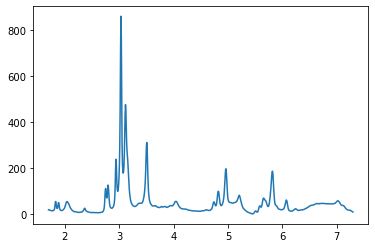

In [9]:
plt.plot(q, X[0])